<a href="https://colab.research.google.com/github/brianyulongzhou/ps2/blob/main/Lab_4_Curve_Fitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Go to `File` $\rightarrow$ `Save a copy in Drive` to save an editable version of this document in your own Google Drive.

# Curve Fitting


In the previous lab, we calculated the horizontal distance $L$ a ball would travel if it were launched from a height $h$ off a ramp. We derived a physical model for where the ball will land, and then calculated a prediction. We then compared this prediction to a measurement of where the ball did land: based on this comparision, we determined if we should accept or revise our model.

In this case, all of our decisions about our model were made on the basis of a single data point. It would probably be a better test of our model if we measured $L$ for several vlaues of $h$, and then made a decision about our model based on *all these measurements*. In this lab, we will learn how to do this using a technique called **curve fitting**.

# Define helper functions

Run the below cell to define a few functions that you'll use later:

Here is a list of the functions you will use in labs and how to use them:

*   `mycurvefit(function, XX, YY, UNCERT)` returns: the best-fit values and uncertainties of fit function `function`, given measured data

  (`XX`, `YY` $\pm$ `UNCERT`)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#@title
def chisquare(data,model,uncertainty):
    '''
    Calculates value of chi squared for model given data and unvertainty
    
    Parameters
    ----------
    data : numpy array
            1D vector of data values
                
    model : numpy array
            1D vector of values predicted by model
    
    uncertainty : numpy array
            1D vector of uncertainty corresponding to data
    
    Returns
    -------
    x2 : float
       Returns value of chi squared for this model given data and uncertainty
    '''

    x2 = np.sum((data-model)**2/uncertainty**2)
    
    return x2


def mycurvefit(func,XX,YY,UNCERT,xlabel=None,ylabel=None,p0=None):
    '''
    Fits data (XX, YY, UNCERT) to function using scipy.curvefit, and then plots data and best fit
        Parameters
    ----------
    func : user-defined function
            Model to be used to fit data
                
    XX : numpy array
            1D vector of data's independent variable
    
    YY : numpy array 
            1D vector of data's dependent variable
            
    UNCERT : numpy array
            1D vector of uncertainty in YY
            
    xlabel: string
            label for plot's x-axis
            
    ylabel : string
            label for plot's y-axis
    
    Returns
    -------
    fitparams : numpy array
           1D array of best fit values of parameters
       
    fiterrs : numpy array
            1D array of errors on best fit parameters (taken from sqrt of diag of covariance matrix)
    
    
    '''
    
    ##################################################
    #                Do the curve fit                #
    ##################################################     
    
    
    # To get curve_fit to use UNCERT, set absolute_sigma = True.  Otherwise sigma = 1
    fitparams,pcov = curve_fit(func,XX,YY,sigma = UNCERT,absolute_sigma=True, p0=p0)

    # Find error in each parameter.  Assumes covariance matrix is roughly diagonal.
    fiterrs = np.sqrt(np.diag(pcov))

    # print out the parameters and errors on them 
    print('Best Fit Parameters:\n')
    i = 0
    for A,sigA in zip(fitparams, fiterrs):
        i = i +1
        mystring = '\t P' + str(i) + ' = '
        print(mystring,round(A,5),'+/-',round(sigA,5))
        
    
    
    ##################################################
    #                Begin Plotting                  #
    ##################################################
    
    fig,ax = plt.subplots()
    # plot the raw data
    ax.errorbar(XX,YY,UNCERT,fmt='.',label='data')
    
    
    # plot the fit
    XX_shade = np.linspace(min(XX),max(XX),100)
    ax.plot(XX_shade,func(XX_shade,*fitparams),label = 'best fit')
    
    if xlabel == None:
      xlabel = ''
    if ylabel == None:
      ylabel = ''

    # make the plot nice
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.legend()
    
    
    
    ##################################################
    #    Calculate and display the fit metrics       #
    ##################################################
    
    # calculate the number of degrees of freedom
    shape = np.shape(XX)
    dof = shape[0] - len(fitparams)
    
    print('\n Fit Metrics:\n')
    print('\t Degrees of freedom (N-d): ', dof)
    
    X2 = chisquare(YY,func(XX,*fitparams),UNCERT)
    #X2string = '\t Chi Squared = ' + str(round(X2,1))
    X2redstring = '\t Reduced Chi Squared = '+ str(round(X2/dof,3))
    #print(X2string)
    print(X2redstring)

    
    return fitparams,fiterrs


## The Logistics

Edit this cell and add the names of your group memembers here:

>> Lab member 1:

>> Lab member 2:

>> Lab member 3:

* As you go through this document, be sure to answer any questions posed in a text cell where indicated. Your text should be preceeded by the double `>>` as shown above.
* At the end of the lab, you'll download this notebook and then upload it to Canvas/Gradescope *before you leave*. 

# Review: The Reduced $\chi^2$ Statistic

How do you know if a model is a good fit to a set of data? Looking at the plot is a good first step, but we want to be more quantitative than this. (You can't publish a paper and just put "the plot looked nice" as justification for your findings!) We need a metric which can tell us how good our fit is.

One metric we can use is known as the $\chi_{red}^2$ ("reduced chi-squared") statistic. Given a model and measured data, $\chi_{red}^2$ can be calculated using the following equation:

$$\chi_{red}^2 = \frac{1}{N-d}\sum_i^N \frac{(y_{data,i}-y_{model,i})^2}{\delta y_i^2} \$$

where you have taken $N$ data points $y_{data,i}\pm \delta y_i$, and you are comparing those points to a set of modeled values $y_{model,i}$. The number of parameters you are fitting is given by $d$. For example, a linear model $y=mx+b$ has two parameters, $m$ and $b$; for this model, $d=2$. 

The reduced $\chi^2$ statistic can be thought of as the average (squared) number of error bars separating your data and model. **For a good fit, we expect the reduced $\chi^2$ value to be close to 1 (each data point is on average about one error bar away from the model).**

# Activity 1a: Devise your model

In this lab, you are given a spring with unknown spring constant $k$. However, you can determine $k$ by hanging weights with known mass $m$ from the bottom of the spring, and then measuring the spring's stretched length $y$. A schemeatic of this set up is shown below.

Using your physics knowledge, come up with a model for $y$ in terms of $m$ (your measured masses), as well as $k$ and/or any other relevant constants or parameters. Record your model in the cell below:

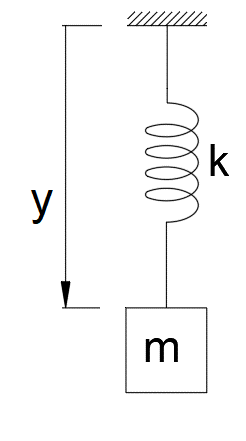

>>Record your model here:

$$y(m) = ??? $$

Now, in the below cell, write a *Python function* which calculates your model given values of $m$, and the other relevant fit parameters. We haven't done too much with Python function before, but if you write out your calculation of `y` in the indented block, the function should work.

You may also rename `fit_parameter_1`, `fit_parameter_2`, etc. to the names of any relevant fit parameters.

**Please call over a TF or talk to another group if you're having trouble with this!**

In [ ]:
def my_fit_model(m, fit_parameter_1, fit_parameter_2, ...): #you may add/remove variables, and change their names!

  y = ... #your equation here 

  return y

# Activity 1b: Take your data

Now, take some data! Choose a spring  and some masses from the front of the room. If you measure $y$ as a function of $m$, you can deduce the value of $k$. 

Explain your procedure below - you can always update your procedure later but it's nice to have an idea of where to start:

>> Your answer here

Record your measurements in the below cell. Also note that you'll want to calculate uncertainties for your $y$ values. For each mass value, have each member of your group measure $y$. Record each measurement of $y$ for a given mass in format shown below:

In [ ]:
m = np.array([111,222, ...]) # g #your mass values here 

y = np.array([[333,323, ...], #y measurements for first mass value - here for m = 111 g
              [444, 434, ...], #you measurements for second mass value - here for m = 222 g
              [...], #you measurements for third mass value, and so on
                  ])

The below code will help you compute uncertainties on $y$. You can calculate the mean and standard deviation of each *row or column* in an array by specifying an `axis`, as shown below.

Once you've computed the uncertainties on your data, make a plot of your data with uncertainties using `plt.errorbar()`.

In [ ]:
y_mean = np.mean(y, axis = 1)
y_std = np.std(y, axis = 1)

y_err = ... #calculate the uncertainty on y_mean here

plt.errorbar(m, y_mean, y_err, fmt = '.', capsize = 8)

# Activity 2: Fit your data

Now, we can fit our measurements to our model. Python has a number of functions which will compute the fit parameters which minimize $\chi^2_{red}$ for a given model. We've written a nice function, `mycurvefit()`, which will do this calculation for you. You just need to specify a Python function which represents your model, and your data.

Replace `fit_function`, `xdata`, `ydata`, and `errors` with the appropriate values, and then run the below cell to fit your data.

Notice! This function saves the fit parameters in the variable `fitparam` and their uncertainties in `fiterr`.

In [ ]:
fitparam, fiterr = mycurvefit(fit_function, xdata, ydata, errors) #replace inputs with your fit function, data, and uncertainties

Make a plot of your data, along with the best fit line, below.

In [ ]:
#Make your plot here - you can copy and paste any code you need from the above cells

#Activity 3: Interpret your fit

Is your model consistent with your data? Explain why or why not.

>> Your answer here

If your model is not consistent with your data, you may need to revise your model. Describe any model revision you made below, then re-run your code with the updated model. Is the updated model consistent with your data? Why or why not?

>> Your answer here

Based on your best-fit parameters, what is the spring constant $k$ of your spring? What are its uncertainties? Be sure to include correct units! (You can do any necessary calculations in the cell below - feel free to add additional cells as needed!)

>> Your answer here

What are the values of the other parameters in your model (if any)? What, physically, do the represent? Do their values make sense? Explain why or why not.

>> Your answer here

In [ ]:
#Add any code you need here!

#Activity 4: The mystery mass!

Now that you have fit your data, you can use your apparatus to measure an object with an unknown mass! This can be anything you and your group want to find the mass of - the TFs also have Mystery Masses for you to measure.

Predict the mass of your object, and record your prediction. Then, use your spring setup and the values from your fit to determine the value of the object's mass (**with uncertainty**, hint: you will need error propagation). Explain your procedure below - feel free to add any text or code cells needed to do your calculation!

>> Your Prediction here: 

>> Explain your procedure to measure the mass here:

In [ ]:
#Add any code you use here!

# Reflection

1. Do you trust the calibration of your spring scale? Explain why or why not.

>> Answer here

2. What sets the precision of your spring scale?

>Answer here!

Finally, please return any springs and masses used to the front of the room.

# How to submit

- Go to `File` $\rightarrow$ `Download` $\rightarrow$ `Download .ipynb` 
- Upload the file via the Canvas assignment (it will take you to Gradescope.)
- IMPORTANT: Only upload ONE COPY, making sure to add all group members to the submission!
-Please complete the Lab 1 Post-Lab Survey (on Canvas) before you leave lab!